In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from utils.iterables import all_connectivities

In [4]:
df = pd.read_csv("mesc_thresholded.csv", index_col=0)
df["sorted_pair"] = df.apply(lambda row: tuple(sorted([row['node_a'], row['node_b']])), axis=1)
df= df.drop_duplicates(subset=['sorted_pair', "cluster_label", "fold"])

In [5]:
from itertools import combinations
networks = df.node_a.unique()
stable_msk = (df.cluster_label == 0)
df_scaled = df.copy().loc[~stable_msk]
for net_a, net_b in all_connectivities(networks):
    ref_net_msk = (df.node_a == net_a) & (df.node_b == net_b)
    target_net_msk = (df_scaled.node_a == net_a) & (df_scaled.node_b == net_b)

    ref_value = df[ref_net_msk & stable_msk]["pattern_value"].median()
    df_scaled.loc[target_net_msk, "pattern_value"] -= ref_value
    
    

In [6]:
test_outcome = pd.read_csv("tukeyhsd_blockwise.csv", index_col=0)
test_outcome["sorted_pair"] = test_outcome.apply(lambda row: tuple(sorted([row['block_a'], row['block_b']])), axis=1)

array([('Cont', 'Cont'), ('Cont', 'Default'), ('Cont', 'DorsAttn'),
       ('Cont', 'Limbic'), ('Cont', 'SalVentAttn'), ('Cont', 'SomMot'),
       ('Cont', 'Vis'), ('Default', 'Default'), ('Default', 'DorsAttn'),
       ('Default', 'Limbic'), ('Default', 'SalVentAttn'),
       ('Default', 'SomMot'), ('Default', 'Vis'),
       ('DorsAttn', 'DorsAttn'), ('DorsAttn', 'Limbic'),
       ('DorsAttn', 'SalVentAttn'), ('DorsAttn', 'SomMot'),
       ('DorsAttn', 'Vis'), ('Limbic', 'Limbic'),
       ('Limbic', 'SalVentAttn'), ('Limbic', 'SomMot'), ('Limbic', 'Vis'),
       ('SalVentAttn', 'SalVentAttn'), ('SalVentAttn', 'SomMot'),
       ('SalVentAttn', 'Vis'), ('SomMot', 'SomMot'), ('SomMot', 'Vis'),
       ('Vis', 'Vis')], dtype=object)

In [7]:
(test_outcome[test_outcome.significant].groupby(("sorted_pair"))["diff"].mean() > 0)

sorted_pair
(Cont, Cont)                  False
(Cont, Default)               False
(Cont, DorsAttn)              False
(Cont, SalVentAttn)           False
(Cont, SomMot)                False
(Cont, Vis)                    True
(Default, Default)            False
(Default, DorsAttn)            True
(Default, Limbic)             False
(Default, SalVentAttn)        False
(Default, SomMot)             False
(Default, Vis)                False
(DorsAttn, DorsAttn)          False
(DorsAttn, Limbic)             True
(DorsAttn, SalVentAttn)       False
(DorsAttn, SomMot)            False
(DorsAttn, Vis)               False
(Limbic, Limbic)              False
(Limbic, SalVentAttn)          True
(Limbic, SomMot)               True
(Limbic, Vis)                  True
(SalVentAttn, SalVentAttn)    False
(SalVentAttn, SomMot)         False
(SalVentAttn, Vis)             True
(SomMot, SomMot)              False
(SomMot, Vis)                 False
(Vis, Vis)                    False
Name: diff, dtyp

In [8]:
df.groupby(by="sorted_pair")["pattern_value"].mean()

sorted_pair
(Cont, Cont)                  0.020549
(Cont, Default)               0.001326
(Cont, DorsAttn)              0.001870
(Cont, Limbic)               -0.000194
(Cont, SalVentAttn)           0.001779
(Cont, SomMot)                0.000294
(Cont, Vis)                  -0.001143
(Default, Default)            0.014071
(Default, DorsAttn)          -0.000297
(Default, Limbic)             0.000805
(Default, SalVentAttn)        0.000343
(Default, SomMot)            -0.000087
(Default, Vis)               -0.000311
(DorsAttn, DorsAttn)          0.020970
(DorsAttn, Limbic)           -0.001034
(DorsAttn, SalVentAttn)       0.001764
(DorsAttn, SomMot)            0.001946
(DorsAttn, Vis)               0.000755
(Limbic, Limbic)              0.038779
(Limbic, SalVentAttn)        -0.000781
(Limbic, SomMot)             -0.002131
(Limbic, Vis)                -0.000717
(SalVentAttn, SalVentAttn)    0.025207
(SalVentAttn, SomMot)         0.003361
(SalVentAttn, Vis)           -0.000485
(SomMot, SomM

In [9]:
# Ajouter un zero
# Espace entre les barres
# Nom réseaux extérieur matrice
# Barre d'erreur, swarmplot
# Shading

In [10]:
cases = {
    "common_increase": [1, 0],
    "common_decrease": [-1, 0],
    "steep_specific_increase": [0, 1],
    "steep_specific_decrease": [0, -1],
    "u_shape": [-1, 1],
    "inverted_u_shape": [1, -1],
    "flat": [0, 0],
    "monotonous_increase": [1, 1],
    "monotonous_decrease": [-1, -1]
}
cases = {"".join(map(str, el)): k for k, el in cases.items()}
comp_pairs = (
    (1, 0),
    (2, 1),
)
block_values = {}

for block in test_outcome.sorted_pair.unique():
    tmp_values = []
    for a, b in comp_pairs:
        col_msk = (test_outcome.clusterlabel_a == a) & (test_outcome.clusterlabel_b == b)
        gridmsk = (test_outcome.sorted_pair == block)
        diff, is_significant = test_outcome.loc[gridmsk & col_msk, ["diff", "significant"]].values[0]
        if is_significant:
            if diff > 0:
                tmp_values.append(1)
            else:
                tmp_values.append(-1)
        else:
            tmp_values.append(0)
    block_values[block] = "".join(map(str, tmp_values))
    
for k, v in block_values.items():
    block_values[k] = cases[v]
np.unique(list(block_values.values()), return_counts=True)

(array(['common_decrease', 'common_increase', 'flat', 'inverted_u_shape',
        'monotonous_decrease', 'monotonous_increase',
        'steep_specific_decrease', 'steep_specific_increase', 'u_shape'],
       dtype='<U23'),
 array([ 3,  2,  1,  3,  2,  1,  2,  1, 13]))

<BarContainer object of 9 artists>

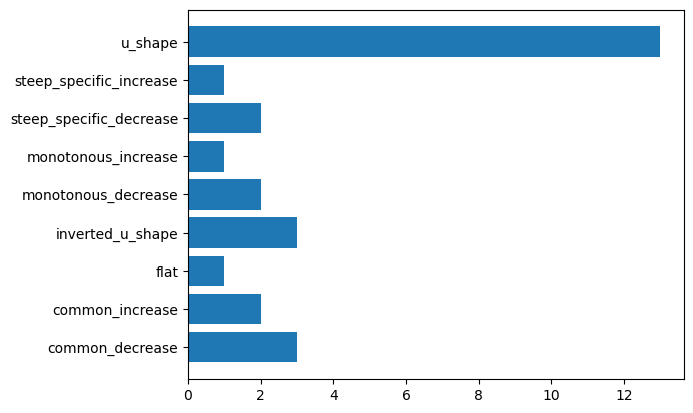

In [11]:
cats, counts = np.unique(list(block_values.values()), return_counts=True)
plt.barh(cats, counts)

In [12]:
import matplotlib as mpl

colors = mpl.colormaps["Paired"].colors
color_mapping = {
    "common_increase": colors[0],
    "common_decrease": colors[1],
    "steep_specific_increase": colors[2],
    "steep_specific_decrease": colors[3],
    "u_shape": colors[4],
    "inverted_u_shape": colors[5],
    "monotonous_increase": colors[6],
    "monotonous_decrease": colors[7],
    "flat": "gray",
}

In [ ]:
from itertools import product
allnets = df_scaled.node_a.unique()
allpairs = list(product(allnets, allnets))
net_square = np.array(allpairs).reshape((7, 7, 2))

('Cont', 'Cont') -0.004468568805388098 0
('Default', 'Cont') -0.001 0


KeyError: ('Default', 'Cont')

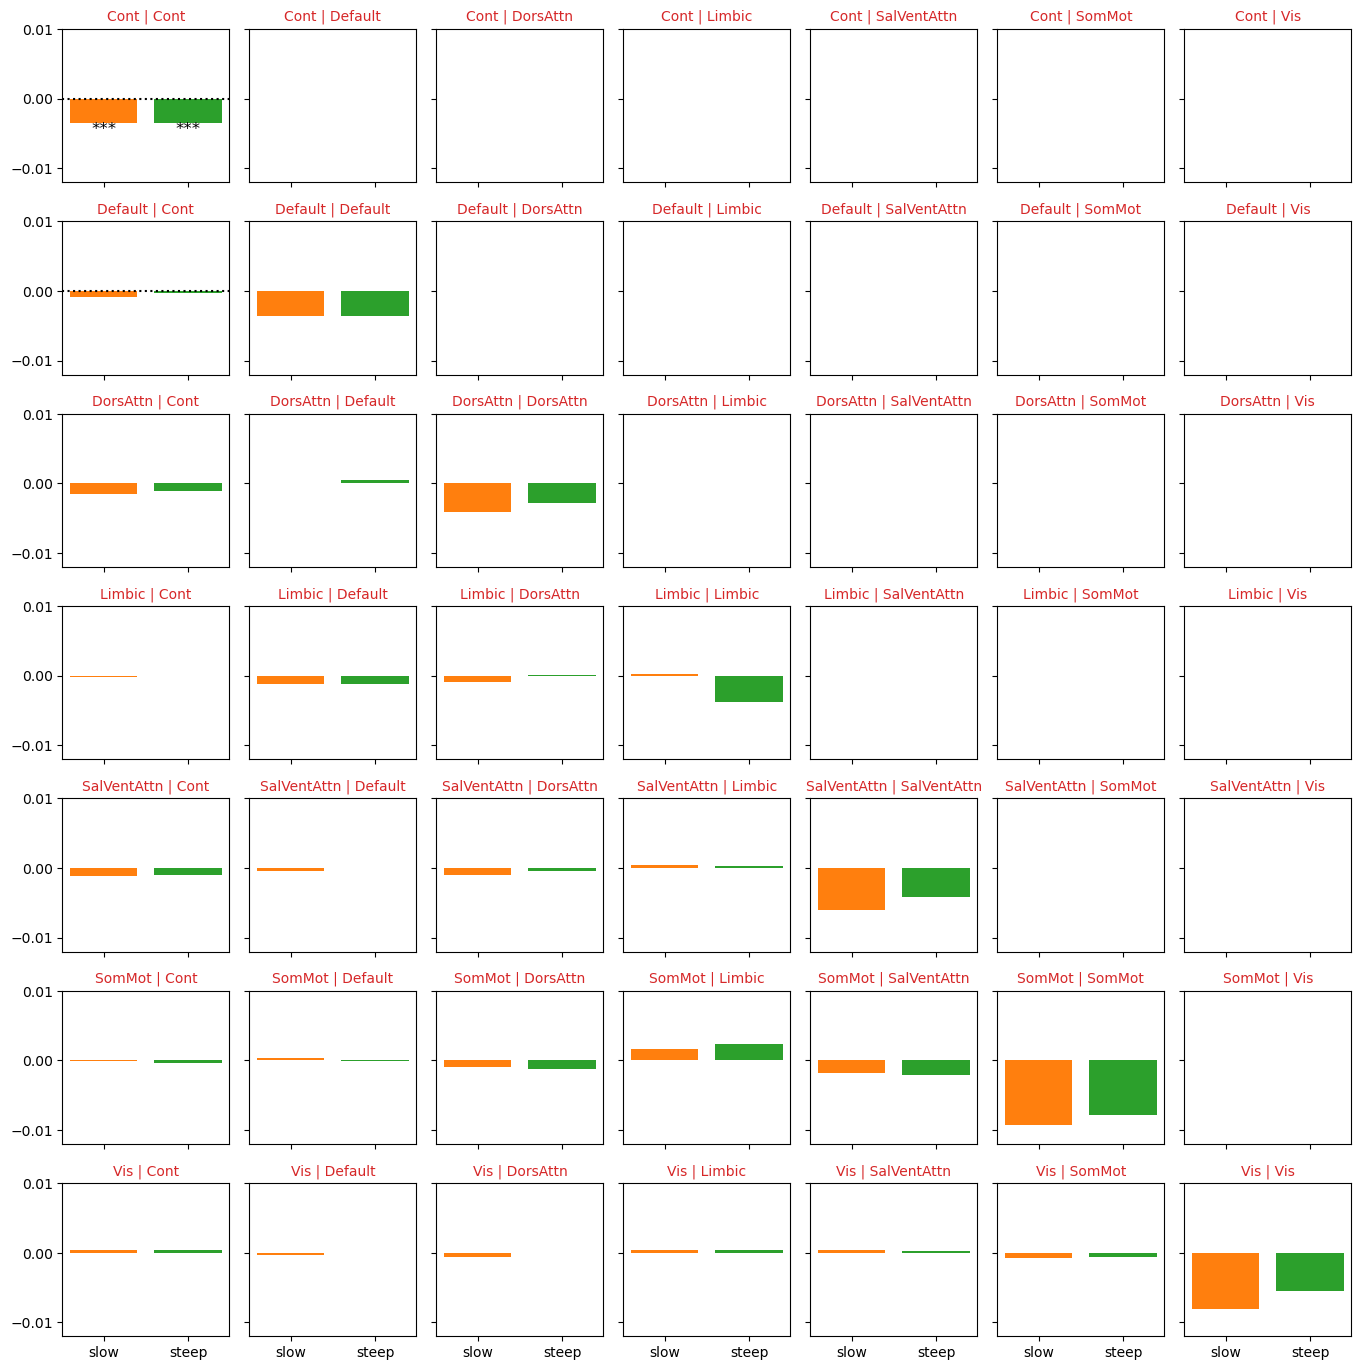

In [142]:
from itertools import product
from math import ceil

grid = sns.FacetGrid(
    df_scaled,
    col="node_a",
    row="node_b",
    hue="cluster_label",
    palette=("tab:orange", "tab:green"),
    #margin_titles=True,
    sharex=True,
    sharey=True,
    despine=False,
    ylim=(-0.012, 0.01),
    height=2
)
grid.map(plt.bar, "cluster_label", "pattern_value")
#grid.set_titles(template="{col_name}-{row_name}", fontsize="xx-large", color="red", fontweight="heavy")
grid.set_titles(
    row_template="{row_name}",
    col_template="{col_name}",
    color="tab:red", fontweight="roman", fontsize="large"
)
#grid.set(xticks=[1, 2], yticks=[])
grid.set(xticks=[1, 2], yticks=[-0.010, 0, 0.010])
grid.set_xticklabels(("slow", "steep"))
grid.set_ylabels("")
grid.set_xlabels("")
y = 0.002

tril_idx = np.tril_indices_from(grid.axes)
triu_idx = np.triu_indices_from(grid.axes, k=1)

comp_pairs = (
    (1, (1, 0)),
    (2, (2, 0)),
    (3, (2, 1)),
)
h = 0.001 # graphic offset param

tril_iterator = zip(net_square[tril_idx], grid.axes[tril_idx])
for i, (networks, ax) in enumerate(tril_iterator):
    
    networks = tuple(ax.title.get_text().split(" | "))
    #networks = tuple(networks[::-1]) # Hacky hacky
    gridmsk = (test_outcome.sorted_pair == tuple(networks))

    y_bar = df_scaled[df_scaled.sorted_pair == networks].pattern_value.max()
    y = df_scaled[df_scaled.sorted_pair == networks].pattern_value.min()
    y_bar = max(0, y_bar)
    y = min(0, y) - h
    print(networks, y, y_bar)
    ax.axhline(y=0, linestyle="dotted", color="black")
    
    case = block_values[networks]
    #ax.text(1.5, 0.005, case, ha="center")  # Display text of trend labels
    #ax.set_facecolor(color_mapping[case]) # Display colors of trend labels

    #ax.set_ylabel("P - P_stable")
    #if tril_idx[1][i] == tril_idx[0][i]:
    #    ax.set_title(networks[1], fontsize="large", color="tab:red", fontweight="roman")
    
    for x, (a, b) in comp_pairs:
        col_msk = (test_outcome.clusterlabel_a == a) & (test_outcome.clusterlabel_b == b)
        pval = test_outcome.loc[gridmsk & col_msk, "p adj"].values[0]

        if 0.01 <= pval < 0.05:
            annotation = "*"
            col = "black"
        elif 0.001 <=  pval < 0.01:
            annotation = "**"
            col = "black"
        elif pval <= 0.001:
            annotation = "***"
            col = "black"
        else:
            annotation = ""
            col = "white"

        if x == 3:
            ax.plot([1, 1, 2, 2], [y_bar + h/2, y_bar + h, y_bar + h, y_bar + h/2], c=col)
            ax.text(1.5, y_bar + h, annotation, ha='center', va='bottom')
        else:
            ax.text(x, y - h, annotation, ha="center", va="bottom", fontsize=12, color="black")

for ax in grid.axes[triu_idx]:
    ax.set_title("")

In [14]:
networks = df.node_a.unique()
patterns_matrix = np.zeros((len(networks), len(networks)), dtype=object)
for i, j in product(range(len(networks)), repeat=2):
    net_a, net_b in all_connectivities(networks)
    patterns_matrix[i, j] = block_values[(net_a, net_b)]

In [15]:
case_mapping = {case: i for i, case in enumerate(cases.values())}
inverse_case_mapping = {i: case for i, case in enumerate(cases.values())}   

# Step 1: Extract unique nodes
nodes = set()
for key in block_values.keys():
    nodes.update(key)

# Step 2: Create a mapping from nodes to indices
node_list = sorted(nodes)
node_index = {node: idx for idx, node in enumerate(node_list)}

# Step 3: Initialize the connectivity matrix
size = len(node_list)
connectivity_matrix = np.zeros((size, size), dtype=int)

# Step 4: Populate the matrix
for (node1, node2), value in block_values.items():
    i, j = node_index[node1], node_index[node2]
    connectivity_matrix[i, j] = case_mapping[value]

In [16]:
profiles_df = pd.DataFrame(connectivity_matrix, index=node_list, columns=node_list)

ModuleNotFoundError: No module named 'neuroginius'

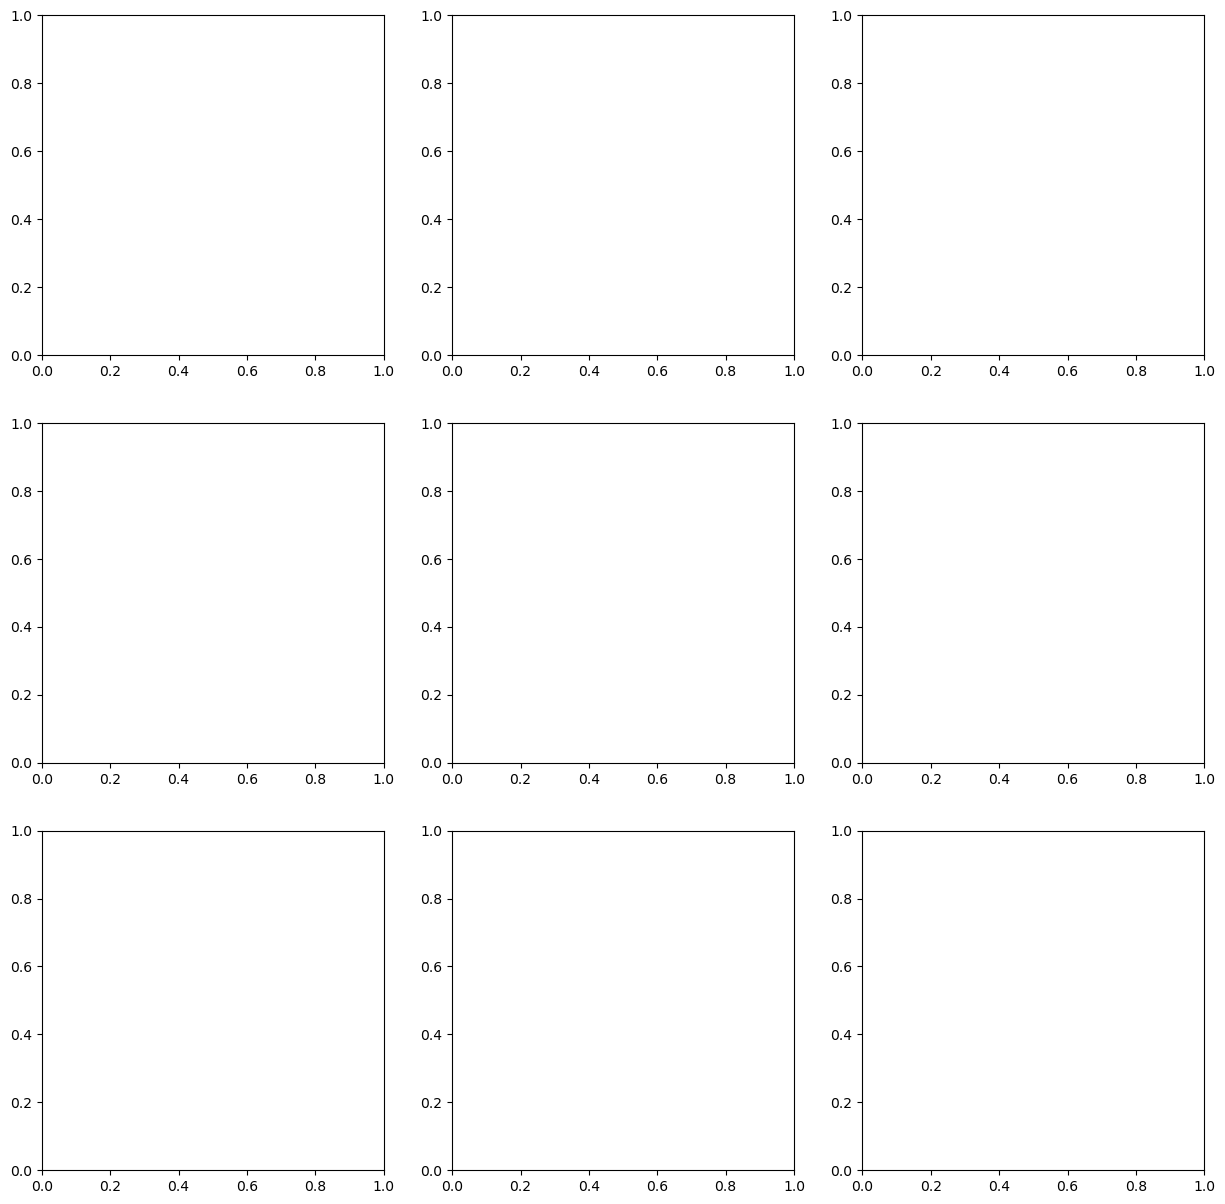

In [17]:
# chord plot for each profile
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
fig, axs = plt.subplots(3,3, figsize=(15, 15))

from neuroginius.plotting import make_links, create_chord, plot_matrix
from matplotlib import patches

for profile_idx, ax in enumerate(axs.flatten()):

    profile_name = inverse_case_mapping[profile_idx]

    tmp_df = profiles_df.map(lambda x: 1 if x == profile_idx else 0)
    links = make_links(tmp_df, zoom=1)

    chordplot = create_chord(node_list, links, size=15, ax=None)

    # Render the chord plot figure to a buffer
    canvas = FigureCanvas(chordplot)
    canvas.draw()
    buf = canvas.buffer_rgba()
    
    # Convert the buffer to a NumPy array
    img = np.asarray(buf)
    
    # Display the image on the subplot
    ax.imshow(img)
    ax.axis('off')

    # # Extract the axes from the chord plot figure
    # for artist in chordplot.get_children():
    #     ax.add_artist(artist)
    # ax = chordplot.axes[0]
    # pos_patch = patches.Patch(color='red', label='value > 0')
    # neg_patch = patches.Patch(color='blue', label='value < 0')
    # plt.legend(handles=[pos_patch, neg_patch])
    ax.set_title(profile_name)
plt.show()

In [ ]:
block_values[(net_a, net_b)]

'u_shape'

In [ ]:
decliners = sns.color_palette("tab10")[1:3]

In [ ]:
intranet_msk = (df_scaled.node_a == df_scaled.node_b)
df_scaled[intranet_msk]

,node_a,node_b,pattern_value,cluster_label,fold,sorted_pair
0,Cont,Cont,-0.003396,1,0,"(Cont, Cont)"
8,Default,Default,-0.003548,1,0,"(Default, Default)"
16,DorsAttn,DorsAttn,-0.004061,1,0,"(DorsAttn, DorsAttn)"
24,Limbic,Limbic,0.000314,1,0,"(Limbic, Limbic)"
32,SalVentAttn,SalVentAttn,-0.005998,1,0,"(SalVentAttn, SalVentAttn)"
...,...,...,...,...,...,...
16,DorsAttn,DorsAttn,-0.002827,2,7,"(DorsAttn, DorsAttn)"
24,Limbic,Limbic,-0.003752,2,7,"(Limbic, Limbic)"
32,SalVentAttn,SalVentAttn,-0.004199,2,7,"(SalVentAttn, SalVentAttn)"
40,SomMot,SomMot,-0.007781,2,7,"(SomMot, SomMot)"


Text(0.5, 1.0, 'Aggregated Pattern differences')

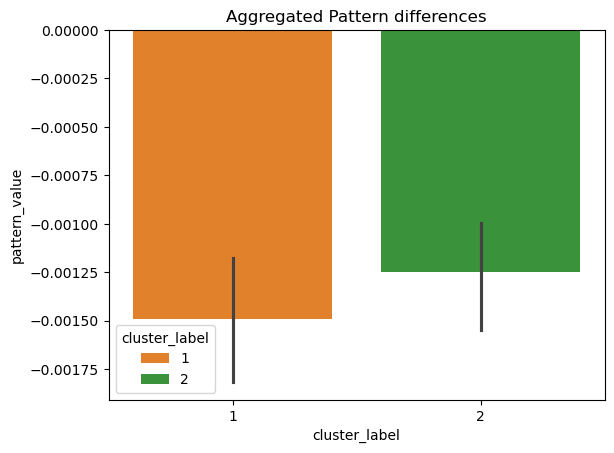

In [ ]:
sns.barplot(df_scaled, x="cluster_label", y="pattern_value", hue="cluster_label", palette=decliners)
plt.title("Aggregated Pattern differences")

In [ ]:
df_scaled

,node_a,node_b,pattern_value,cluster_label,fold,sorted_pair
0,Cont,Cont,-0.003396,1,0,"(Cont, Cont)"
1,Cont,Default,-0.000883,1,0,"(Cont, Default)"
2,Cont,DorsAttn,-0.001497,1,0,"(Cont, DorsAttn)"
3,Cont,Limbic,-0.000122,1,0,"(Cont, Limbic)"
4,Cont,SalVentAttn,-0.001098,1,0,"(Cont, SalVentAttn)"
...,...,...,...,...,...,...
33,SalVentAttn,SomMot,-0.002123,2,7,"(SalVentAttn, SomMot)"
34,SalVentAttn,Vis,0.000188,2,7,"(SalVentAttn, Vis)"
40,SomMot,SomMot,-0.007781,2,7,"(SomMot, SomMot)"
41,SomMot,Vis,-0.000550,2,7,"(SomMot, Vis)"


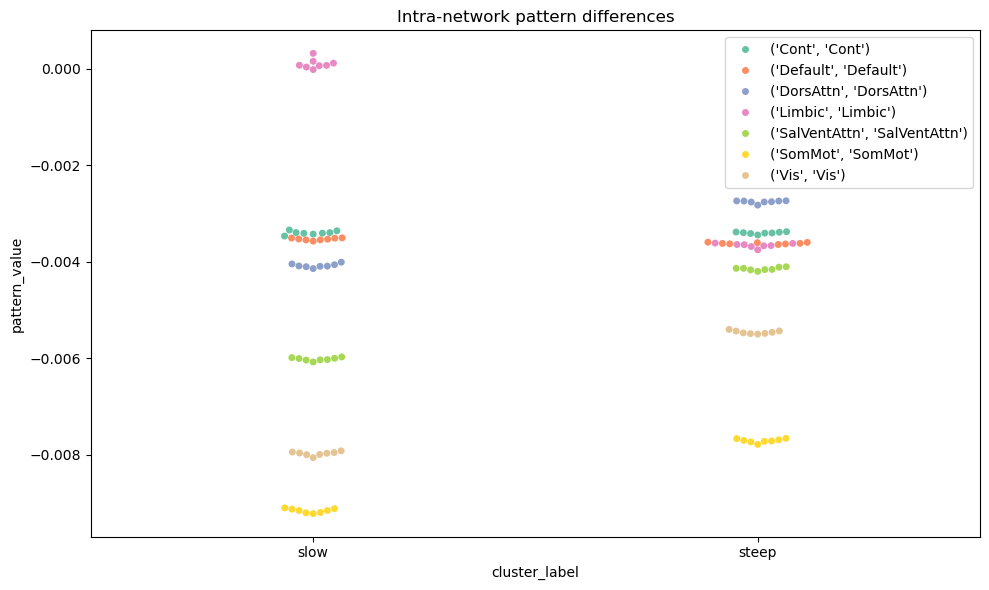

In [ ]:
plt.subplots(figsize=(10, 6))
sns.swarmplot(df_scaled[intranet_msk], x="cluster_label", y="pattern_value", hue="sorted_pair", palette="Set2")
plt.title("Intra-network pattern differences")
plt.xticks(ticks=[0, 1], labels=["slow", "steep"])
plt.tight_layout()
plt.legend(loc="upper right")

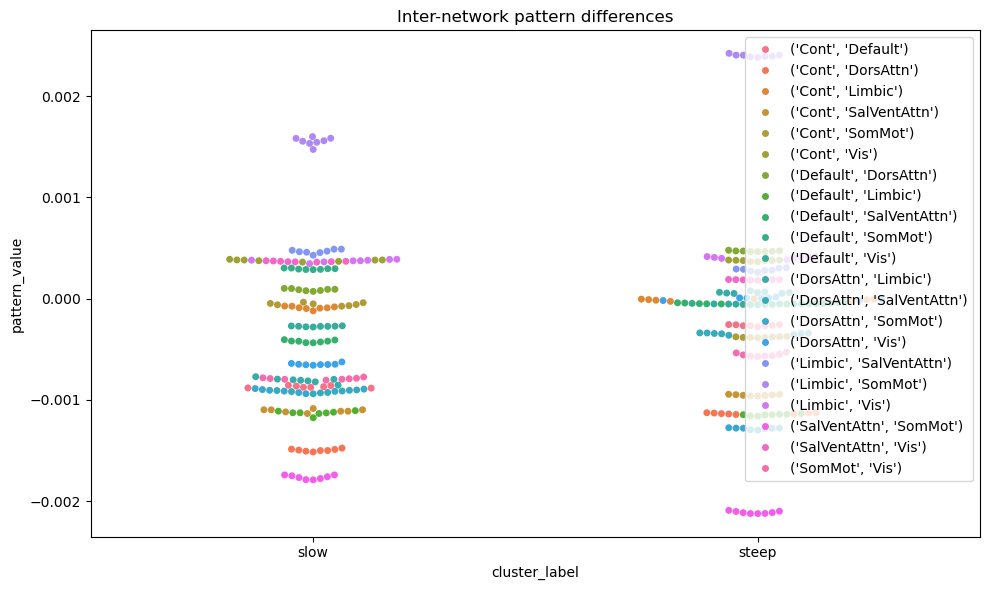

In [ ]:
plt.subplots(figsize=(10, 6))
sns.swarmplot(df_scaled[~intranet_msk], x="cluster_label", y="pattern_value", hue="sorted_pair")
plt.title("Inter-network pattern differences")
plt.xticks(ticks=[0, 1], labels=["slow", "steep"])
plt.tight_layout()
plt.legend(loc="upper right")

Text(0.5, 1.0, 'Inter-network pattern differences')

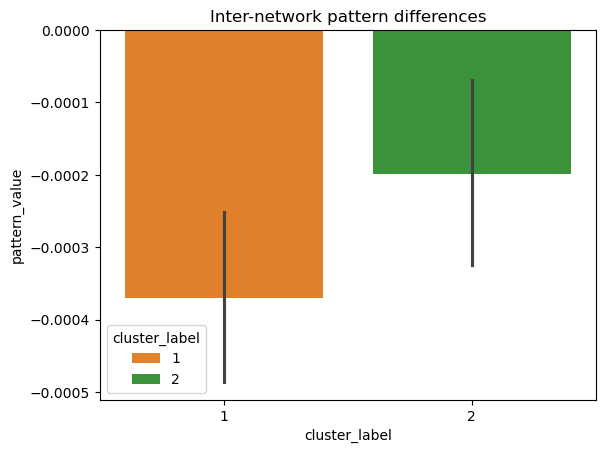

In [ ]:
sns.barplot(df_scaled[~intranet_msk], x="cluster_label", y="pattern_value", hue="cluster_label", palette=decliners)
plt.title("Inter-network pattern differences")